In [38]:
%reload_ext autoreload
%autoreload 2

import my_tools as tools

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import statsmodels.api as sm
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df_student = pd.read_csv('../student_habits_performance_changed.csv')
df_adv = pd.read_csv('advertising.csv')

# Student DataFrame

In [86]:
X = df_student[['study_hours_per_day']]
y = df_student['exam_score']

In [103]:
reg = LinearRegression().fit(X, y)
y_pred_reg = np.multiply(reg.coef_, X) + reg.intercept_
# RSS = tools.var(y, y_pred.values.flatten())

ValueError: Expected a 2-dimensional container but got <class 'pandas.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

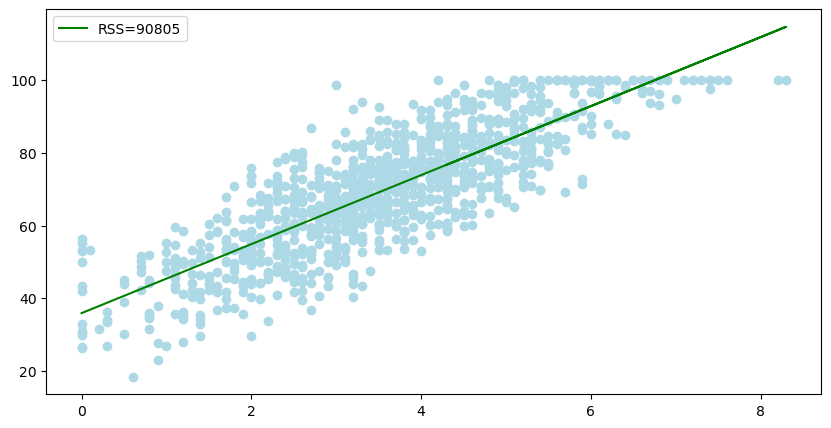

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=X, y=y, color='lightblue')
line, = ax.plot(X, y_pred_reg, color='green')
ax.legend([line], [f"RSS={RSS:.0f}"], loc='upper left')

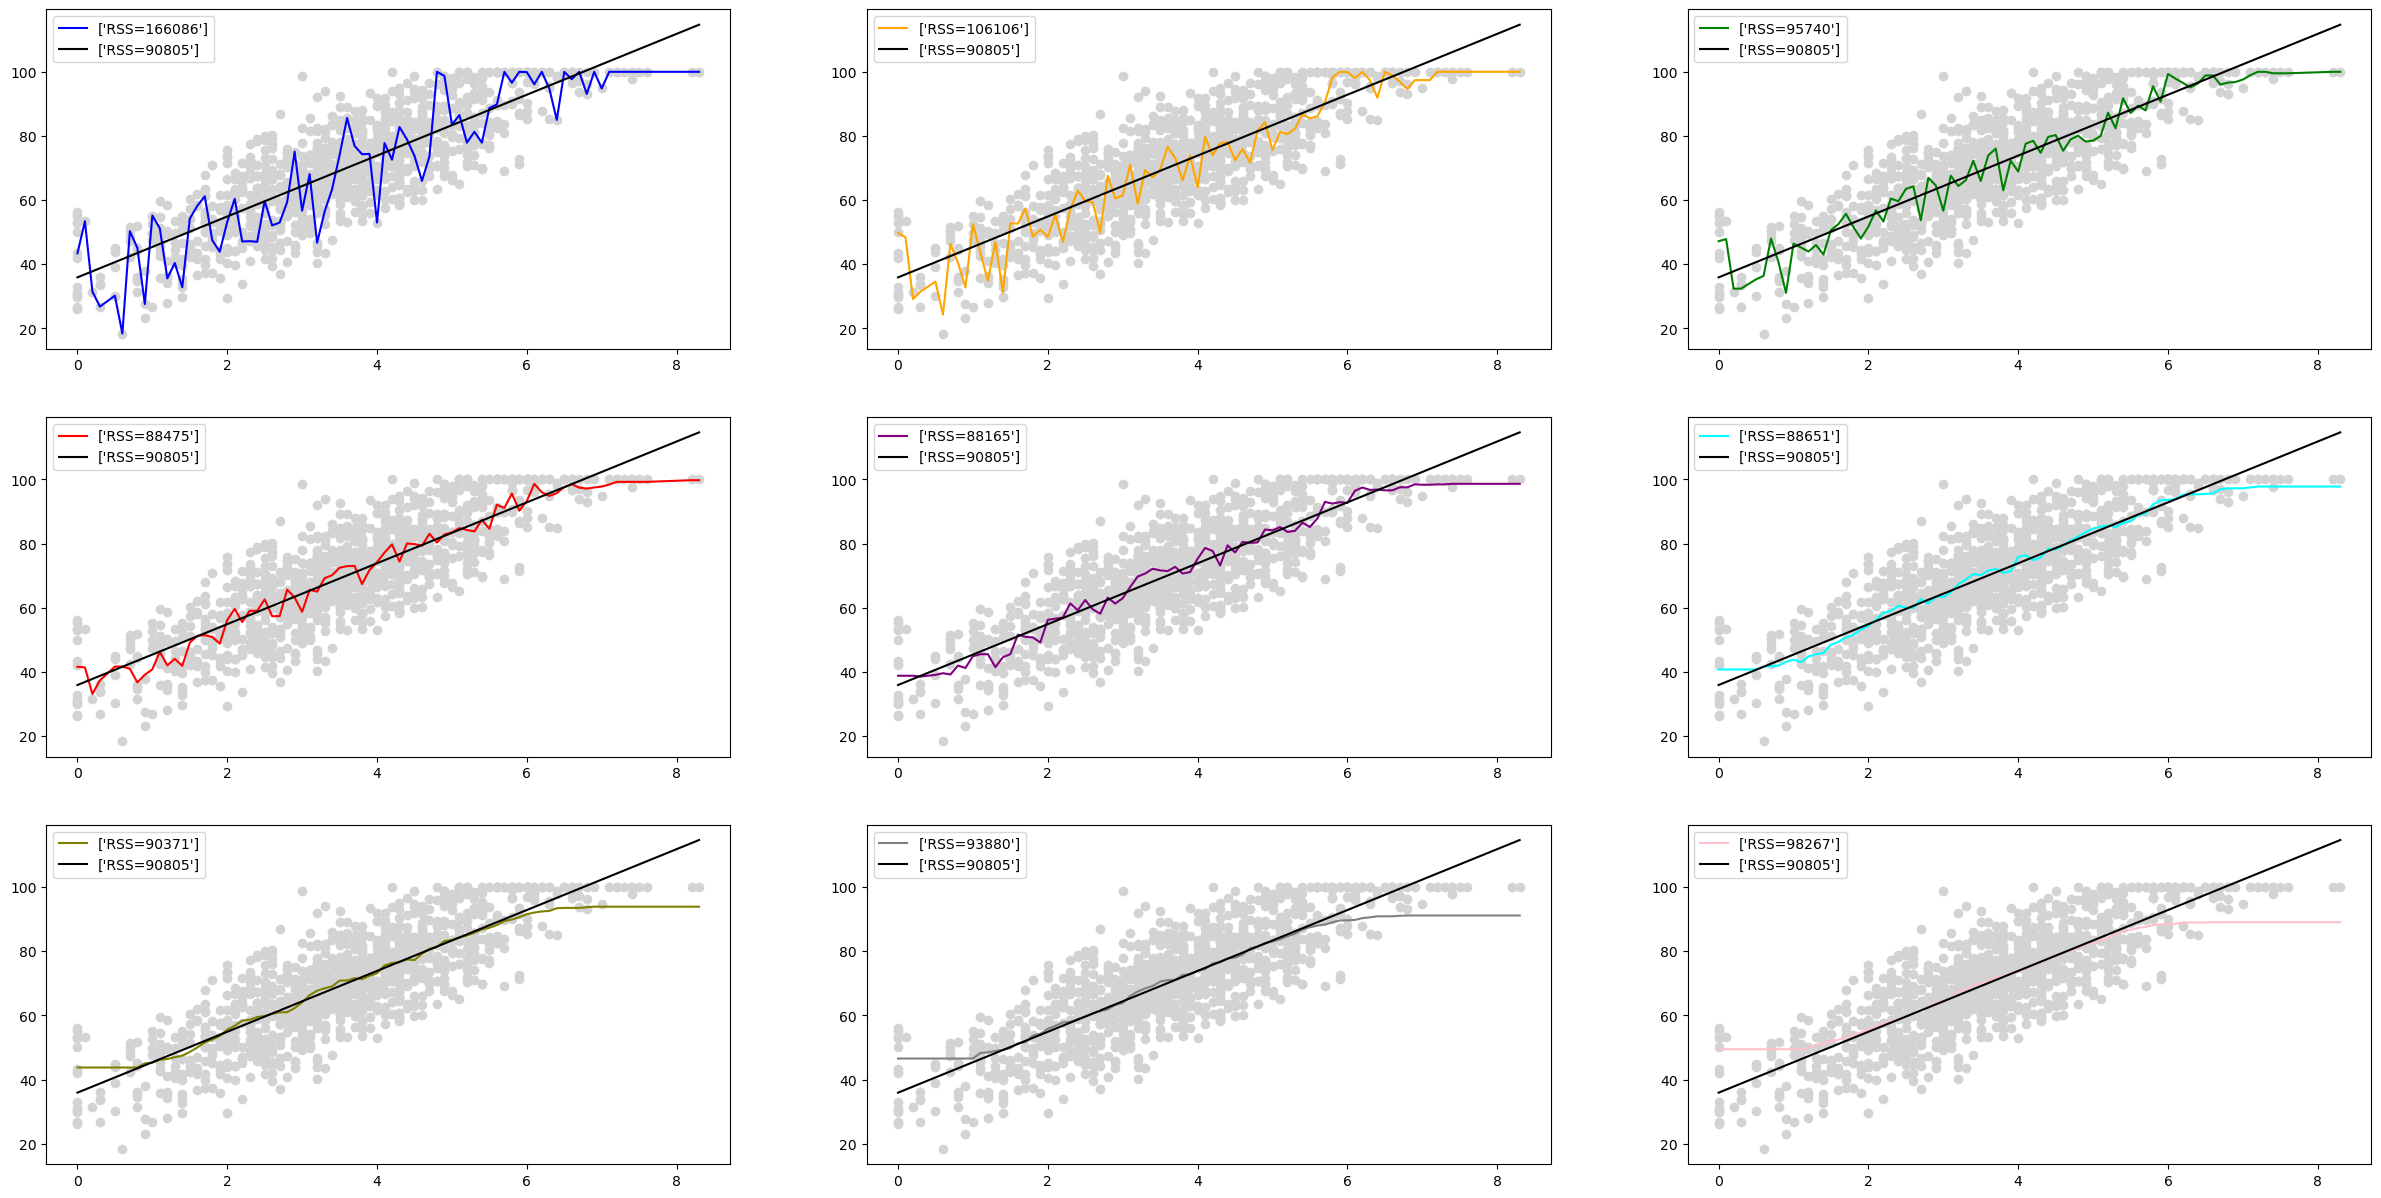

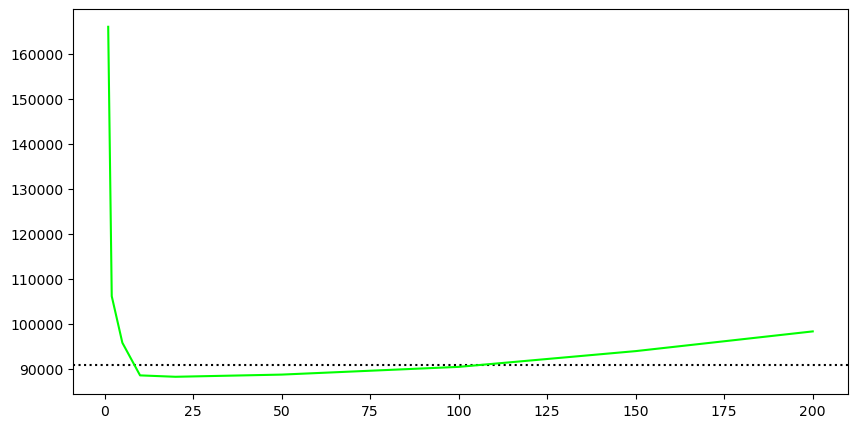

In [101]:
sort_idx = X.values.flatten().argsort()
K = [1, 2, 5, 10, 20, 50, 100, 150, 200]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'olive', 'gray', 'pink']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 15))
ax = axs.flatten()

rss_arr = []

for i in range(len(K)):
    k = K[i]
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X, y)
    y_pred = neigh.predict(X)

    rss = tools.var(y, y_pred)
    rss_arr.append(rss)
    
    ax[i].scatter(x=X, y=y, color='lightgray')
    line1, = ax[i].plot(X.values[sort_idx], y_pred[sort_idx], color=colors[i])
    line2, = ax[i].plot(X.values[sort_idx], y_pred_reg.values[sort_idx], color='black')
    ax[i].legend([line1, line2], [[f"RSS={rss:.0f}"], [f"RSS={RSS:.0f}"]])

fig, ax = plt.subplots(figsize = (10, 5))
ax.axhline(RSS, linestyle='dotted', color='black')
ax.plot(K, rss_arr, color='lime')

# Advertising

In [104]:
X = df_adv[['TV']]
y = df_adv['Sales']

In [110]:
reg = LinearRegression().fit(X, y)
y_pred_reg = np.multiply(reg.coef_, X) + reg.intercept_
RSS = tools.var(y, y_pred_reg.values.flatten())

[Text(0.5, 0, 'K'), Text(0, 0.5, 'RSS')]

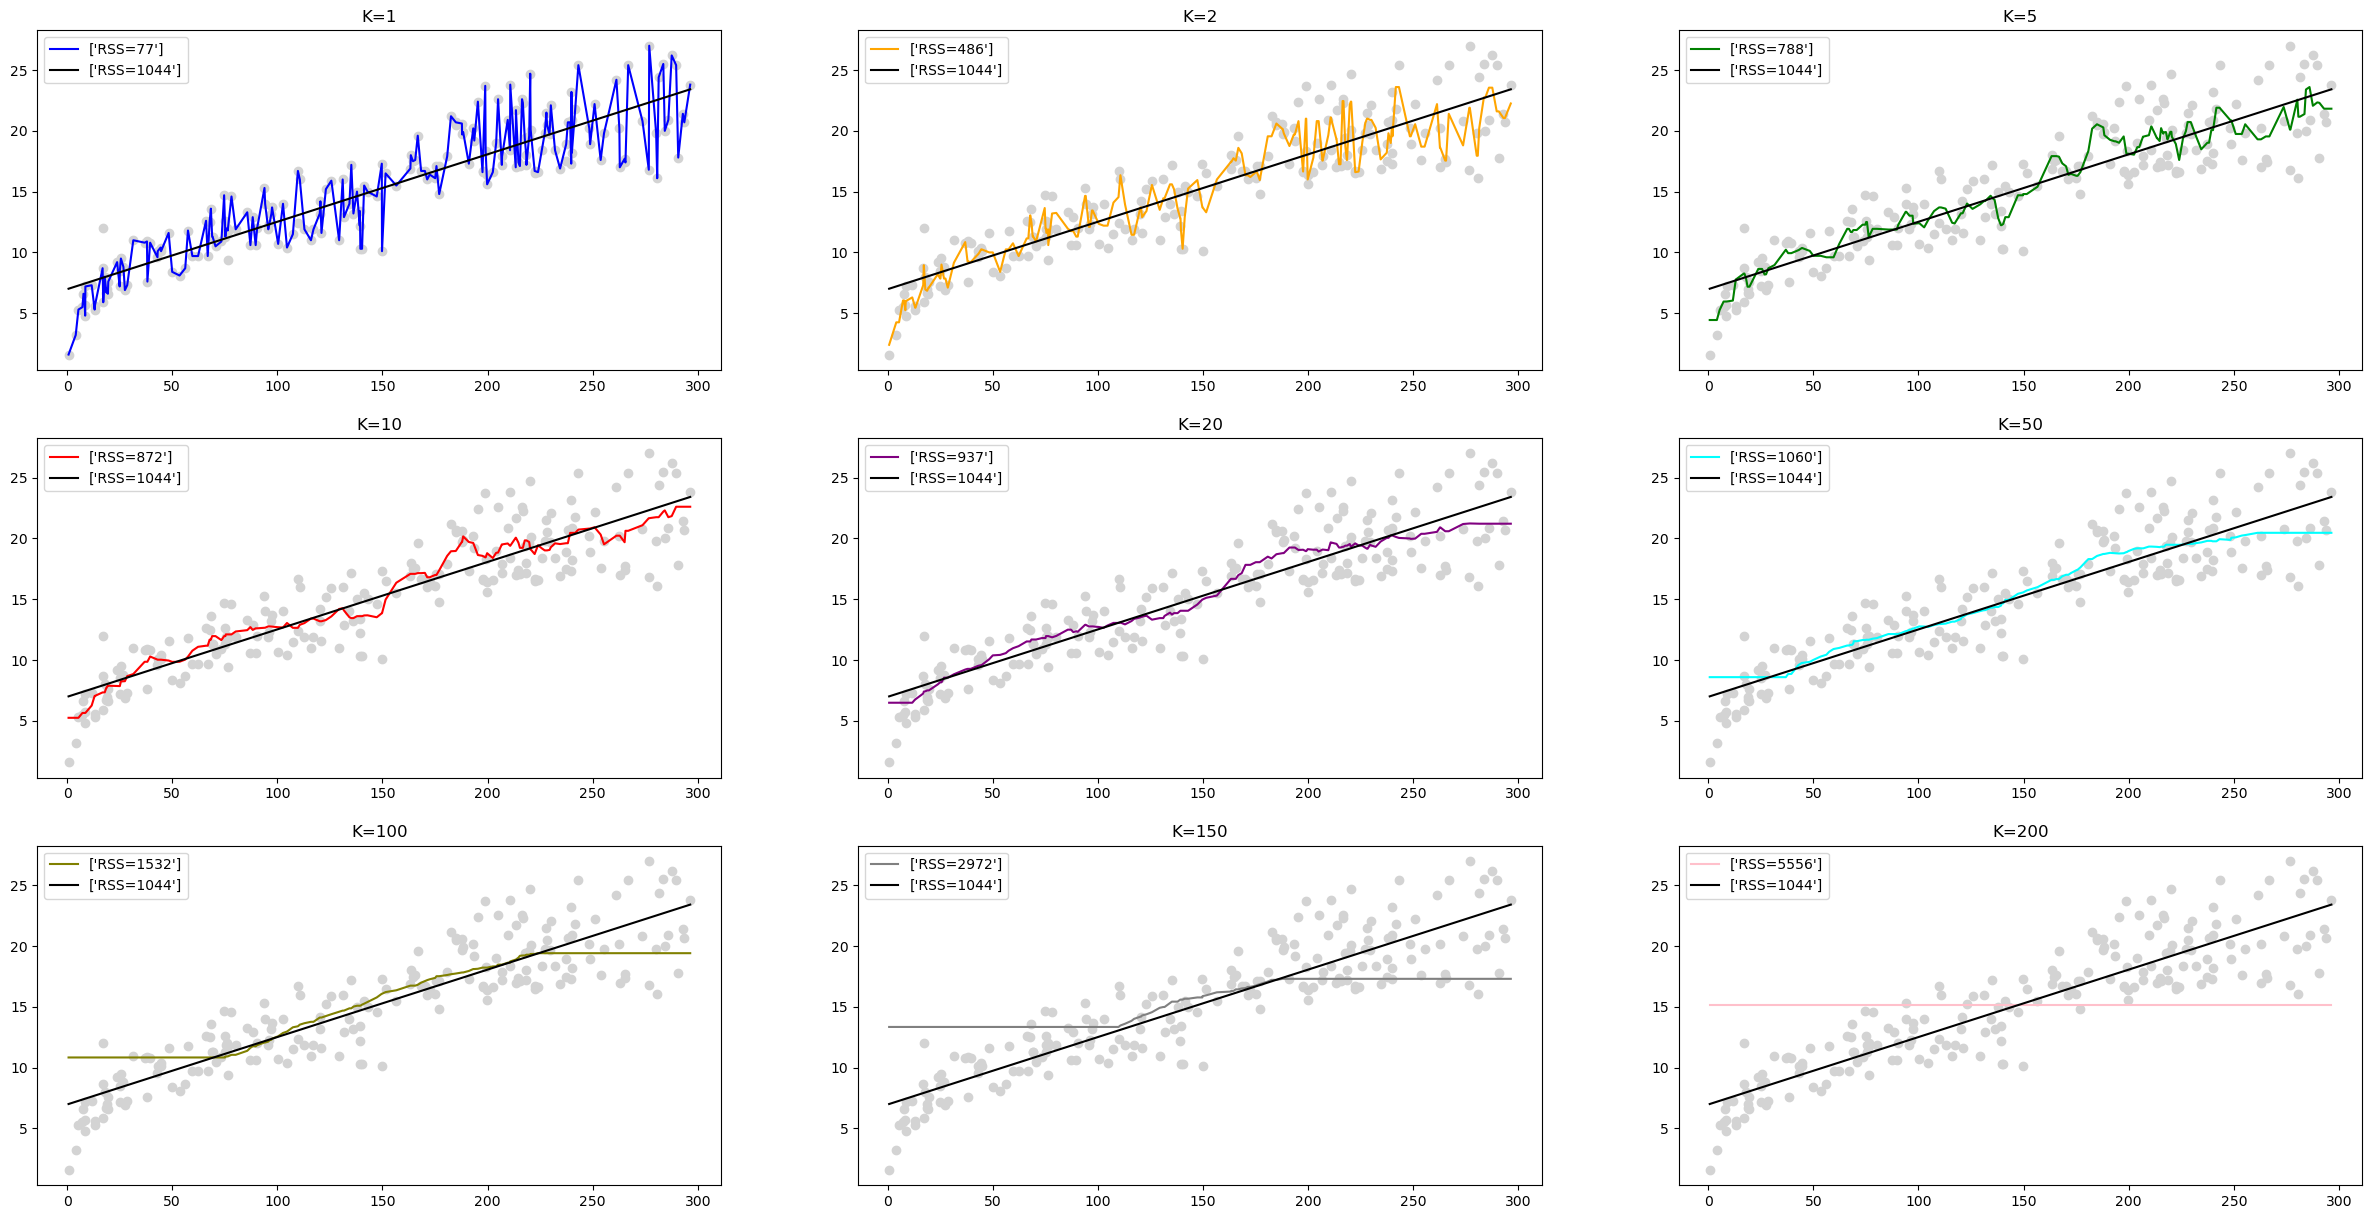

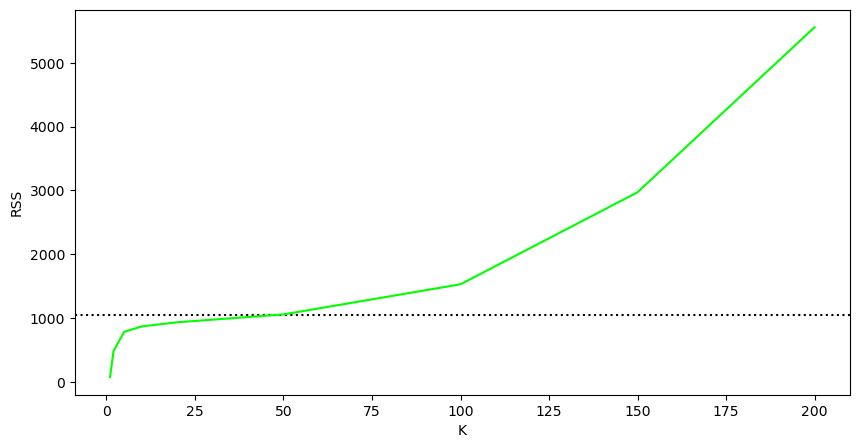

In [114]:
sort_idx = X.values.flatten().argsort()
K = [1, 2, 5, 10, 20, 50, 100, 150, 200]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'olive', 'gray', 'pink']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 15))
ax = axs.flatten()

rss_arr = []

for i in range(len(K)):
    k = K[i]
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X, y)
    y_pred = neigh.predict(X)

    rss = tools.var(y, y_pred)
    rss_arr.append(rss)

    ax[i].set_title(f"K={k}")
    ax[i].scatter(x=X, y=y, color='lightgray')
    line1, = ax[i].plot(X.values[sort_idx], y_pred[sort_idx], color=colors[i])
    line2, = ax[i].plot(X.values[sort_idx], y_pred_reg.values[sort_idx], color='black')
    ax[i].legend([line1, line2], [[f"RSS={rss:.0f}"], [f"RSS={RSS:.0f}"]])
    
fig, ax = plt.subplots(figsize = (10, 5))
ax.axhline(RSS, linestyle='dotted', color='black')
ax.plot(K, rss_arr, color='lime')
ax.set(xlabel='K', ylabel='RSS')

# Addressing the P problem

In [125]:
y = df_adv['Sales']
x = ['TV', 'Radio', 'Newspaper']

In [126]:
p_mat = [x[:i] for i in range(1, len(x) + 1)]

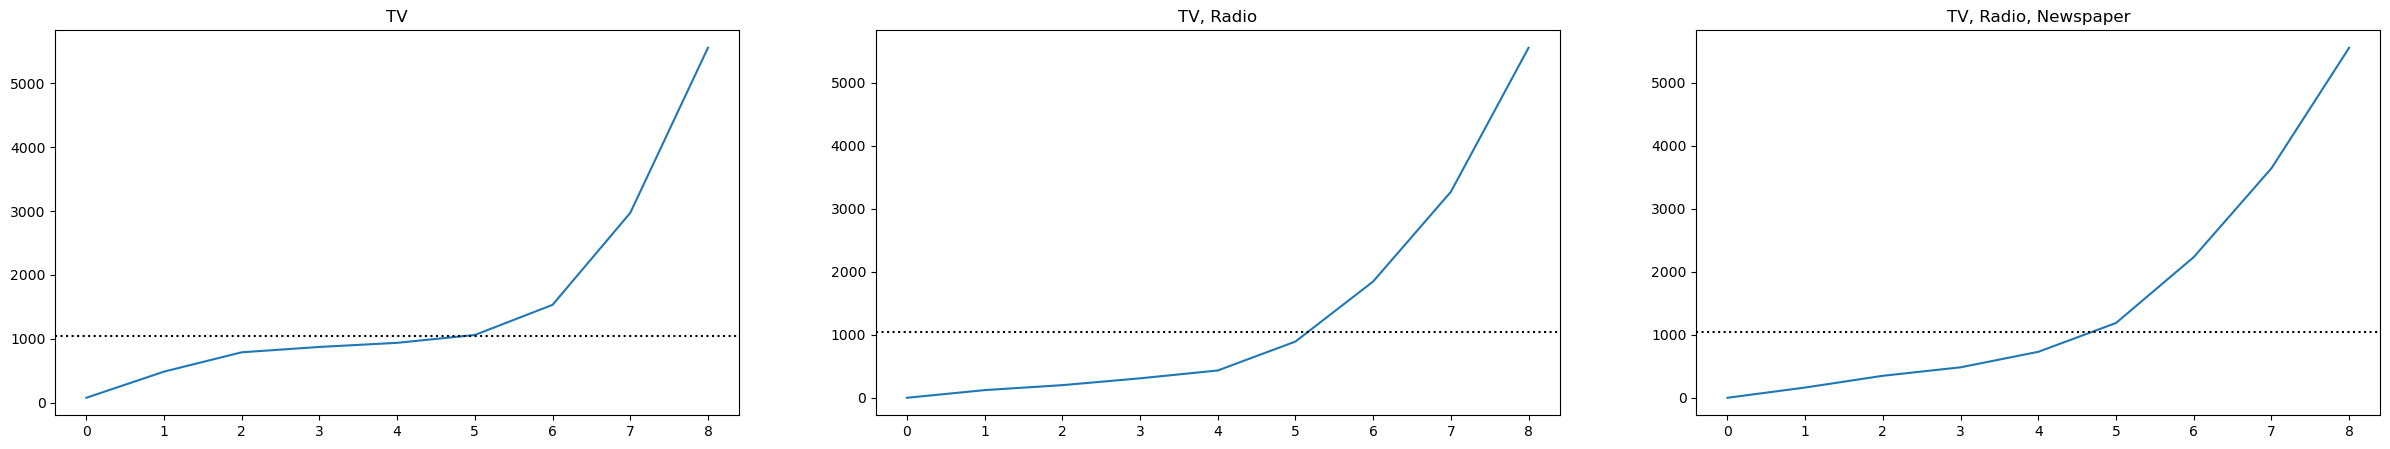

In [141]:

from sklearn.preprocessing import StandardScaler
K = [1, 2, 5, 10, 20, 50, 100, 150, 200]
fig, axs = plt.subplots(ncols = len(p_mat), figsize=(30, 5))
ax=axs.flatten()
for i in range(len(p_mat)):
    pred = p_mat[i]
    rss_arr = []
    X = df_adv[pred].values

    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    
    for k in K:
        df = len(pred) + 1
        neigh = KNeighborsRegressor(n_neighbors=k).fit(X, y)
        y_pred = neigh.predict(X)
        rss = tools.var(y, y_pred)
        rss_arr.append(rss)

    ax[i].set_title(", ".join(pred))
    
    ax[i].plot(rss_arr)
    ax[i].axhline(RSS, linestyle='dotted', color='black')